# Loss Functions in Matrix Form

This notebook explains the concept of loss functions in matrix form, the derivation of gradients, and optimization using gradient descent. We'll implement the concepts with practical Python examples and visualizations.

 I've created a comprehensive Jupyter notebook that explains loss functions in matrix form. The notebook includes:

  1. Mathematical derivation of the loss function matrix form
  2. Step-by-step implementation in Python code
  3. Visualizations of loss surfaces and gradient descent paths
  4. Illustrations of how learning rate affects convergence
  5. Comparison with analytical solutions

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import seaborn as sns

# Set plot styles
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.5)
plt.rcParams['figure.figsize'] = [12, 8]

## 1. Understanding the Loss Function in Matrix Form

In machine learning, a loss function quantifies how well our model is performing. For linear regression, we can represent our loss function (Mean Squared Error) in matrix form.

Given:
- $X$ is our feature matrix (shape: $m \times n$, where $m$ is the number of examples, $n$ is the number of features)
- $y$ is our target vector (shape: $m \times 1$)
- $W$ is our weight matrix (shape: $n \times 1$)
- $\hat{y} = XW$ is our prediction vector

The loss function in matrix form is:

$$L(W) = \frac{1}{m} (\hat{y} - y)^T(\hat{y} - y) = \frac{1}{m} (XW - y)^T(XW - y)$$

Let's break this down with a simple example:

X shape: (100, 3)
y shape: (100, 1)
true_W shape: (3, 1)


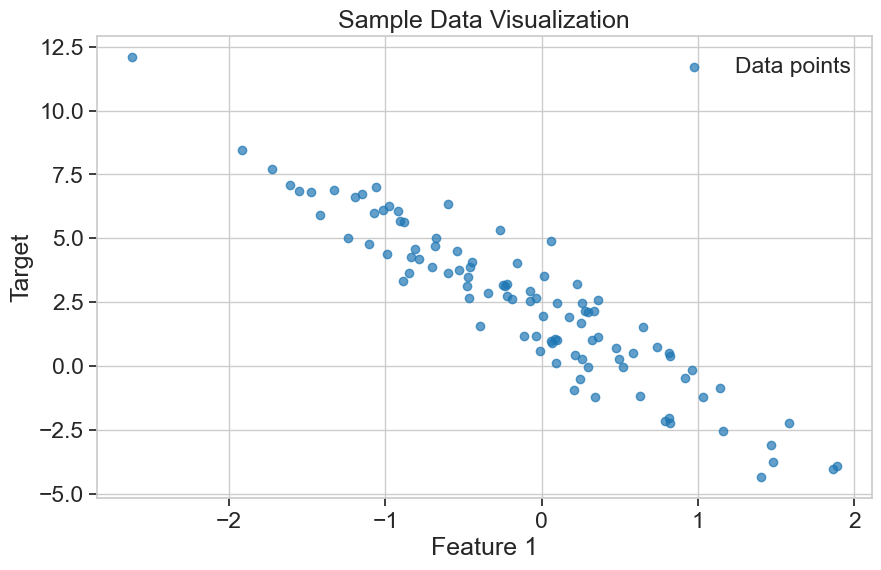

In [2]:
# Generate some sample data
np.random.seed(42)
m = 100  # number of examples
n = 3    # number of features (including bias term)

# True weights (unknown to our model)
true_W = np.array([2, -3.5, 1]).reshape(n, 1)

# Generate random feature matrix X with a column of 1s for the bias term
X = np.hstack([np.ones((m, 1)), np.random.randn(m, n-1)])

# Generate target vector y with some noise
y = X @ true_W + 0.5 * np.random.randn(m, 1)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"true_W shape: {true_W.shape}")

# Visualize a portion of our data
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 1], y, alpha=0.7, label='Data points')
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.title('Sample Data Visualization')
plt.legend()
plt.show()

### Computing the Loss Function

Now let's define a function to compute our Mean Squared Error (MSE) loss:

In [3]:
def compute_loss(X, y, W):
    """
    Compute the Mean Squared Error loss in matrix form.
    
    Parameters:
    X: Feature matrix (m x n)
    y: Target vector (m x 1)
    W: Weight matrix (n x 1)
    
    Returns:
    loss: MSE loss value
    
    """
    m = X.shape[0]
    y_pred = X @ W  # Matrix multiplication for predictions
    error = y_pred - y
    loss = (1/m) * (error.T @ error)  # Matrix form of MSE
    return loss[0, 0]  # Convert from 1x1 matrix to scalar

# Initialize weights to random values
initial_W = np.random.randn(n, 1)
initial_loss = compute_loss(X, y, initial_W)

print(f"Initial random weights: {initial_W.flatten()}")
print(f"Initial loss: {initial_loss:.4f}")

Initial random weights: [-0.82899501 -0.56018104  0.74729361]
Initial loss: 16.4552


## 2. Deriving the Gradient of the Loss Function

To optimize our weights using gradient descent, we need to compute the derivative of the loss function with respect to our weights.

$$\frac{\partial L}{\partial W} = \frac{\partial}{\partial W} \left[ \frac{1}{m} (XW - y)^T(XW - y) \right]$$

Using matrix calculus, this derivative can be expanded as:

$$\frac{\partial L}{\partial W} = \frac{2}{m} X^T(XW - y)$$

Let's see the step-by-step derivation:

1. Start with the loss function: $L(W) = \frac{1}{m} (XW - y)^T(XW - y)$
2. Let's denote $z = XW - y$ for simplicity
3. Then $L(W) = \frac{1}{m} z^Tz$
4. Using the chain rule: $\frac{\partial L}{\partial W} = \frac{\partial L}{\partial z} \frac{\partial z}{\partial W}$
5. $\frac{\partial L}{\partial z} = \frac{2}{m} z^T = \frac{2}{m} (XW - y)^T$
6. $\frac{\partial z}{\partial W} = X$
7. Combining: $\frac{\partial L}{\partial W} = \frac{2}{m} (XW - y)^T X = \frac{2}{m} X^T(XW - y)$

Let's implement this gradient computation in code:

In [4]:
def compute_gradient(X, y, W):
    """
    Compute the gradient of the MSE loss with respect to weights.
    
    Parameters:
    X: Feature matrix (m x n)
    y: Target vector (m x 1)
    W: Weight matrix (n x 1)
    
    Returns:
    gradient: Gradient of the loss with respect to W (n x 1)
    """
    m = X.shape[0]
    y_pred = X @ W
    error = y_pred - y
    gradient = (2/m) * (X.T @ error)
    return gradient

# Compute the gradient at our initial weights
initial_gradient = compute_gradient(X, y, initial_W)
print(f"Initial gradient: {initial_gradient.flatten()}")

Initial gradient: [-6.41955757  4.86256036 -0.39188925]


## 3. Implementing Gradient Descent

Now that we have our loss function and its gradient, we can implement gradient descent to optimize our weights. The update rule for gradient descent is:

$$W_{new} = W_{old} - \alpha \frac{\partial L}{\partial W}$$

Where $\alpha$ is the learning rate.

In [5]:
def gradient_descent(X, y, initial_W, learning_rate=0.01, num_iterations=1000, print_interval=100):
    """
    Perform gradient descent to optimize weights.
    
    Parameters:
    X: Feature matrix (m x n)
    y: Target vector (m x 1)
    initial_W: Initial weight matrix (n x 1)
    learning_rate: Learning rate for gradient descent
    num_iterations: Number of iterations to perform
    print_interval: How often to print the loss
    
    Returns:
    W: Optimized weight matrix
    loss_history: List of loss values during training
    """
    W = initial_W.copy()
    loss_history = []
    
    for i in range(num_iterations):
        # Compute the gradient
        gradient = compute_gradient(X, y, W)
        
        # Update weights using gradient descent
        W = W - learning_rate * gradient
        
        # Compute and store the loss
        loss = compute_loss(X, y, W)
        loss_history.append(loss)
        
        # Print progress
        if i % print_interval == 0:
            print(f"Iteration {i}: Loss = {loss:.4f}")
    
    return W, loss_history

# Run gradient descent
optimized_W, loss_history = gradient_descent(X, y, initial_W, learning_rate=0.01, num_iterations=1000)

print(f"\nOptimized weights: {optimized_W.flatten()}")
print(f"True weights: {true_W.flatten()}")
print(f"Final loss: {loss_history[-1]:.4f}")

Iteration 0: Loss = 15.8117
Iteration 100: Loss = 0.5896
Iteration 200: Loss = 0.2873
Iteration 300: Loss = 0.2780
Iteration 400: Loss = 0.2775
Iteration 500: Loss = 0.2775
Iteration 600: Loss = 0.2775
Iteration 700: Loss = 0.2775
Iteration 800: Loss = 0.2775
Iteration 900: Loss = 0.2775

Optimized weights: [ 2.04639721 -3.40463849  0.91392879]
True weights: [ 2.  -3.5  1. ]
Final loss: 0.2775


### Visualizing the Loss History

Let's visualize how our loss decreases during training:

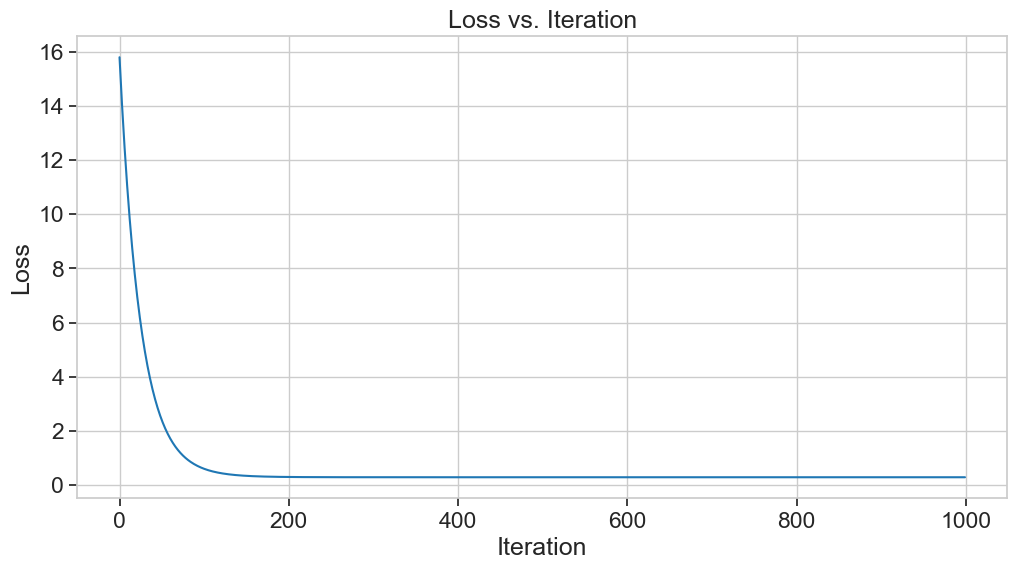

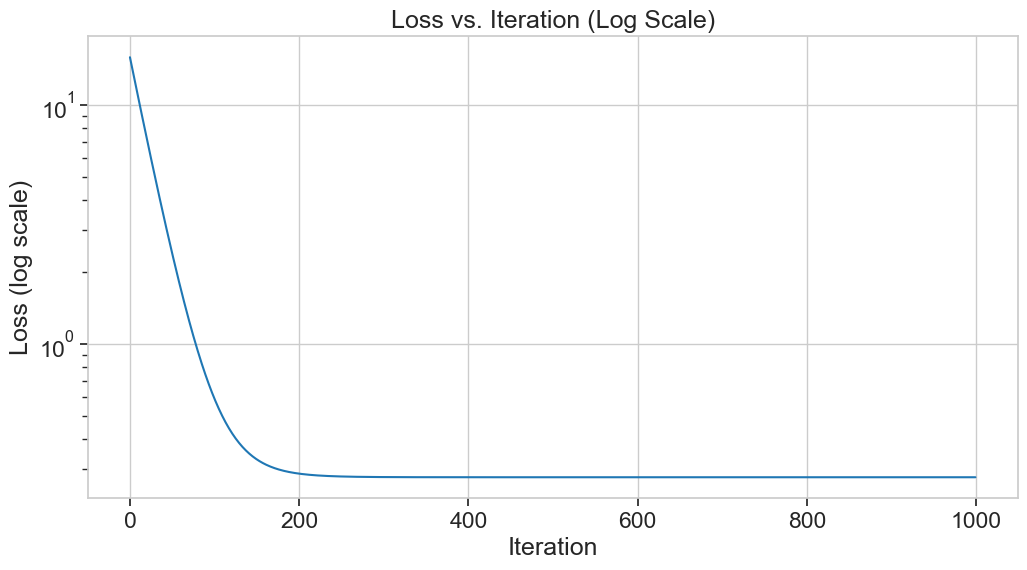

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs. Iteration')
plt.grid(True)
plt.show()

# Also plot with log scale to better see the convergence pattern
plt.figure(figsize=(12, 6))
plt.semilogy(loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss (log scale)')
plt.title('Loss vs. Iteration (Log Scale)')
plt.grid(True)
plt.show()

## 4. Visualizing the Loss Surface

To better understand the optimization process, let's visualize the loss surface for a simplified 2D case (with just two weights).

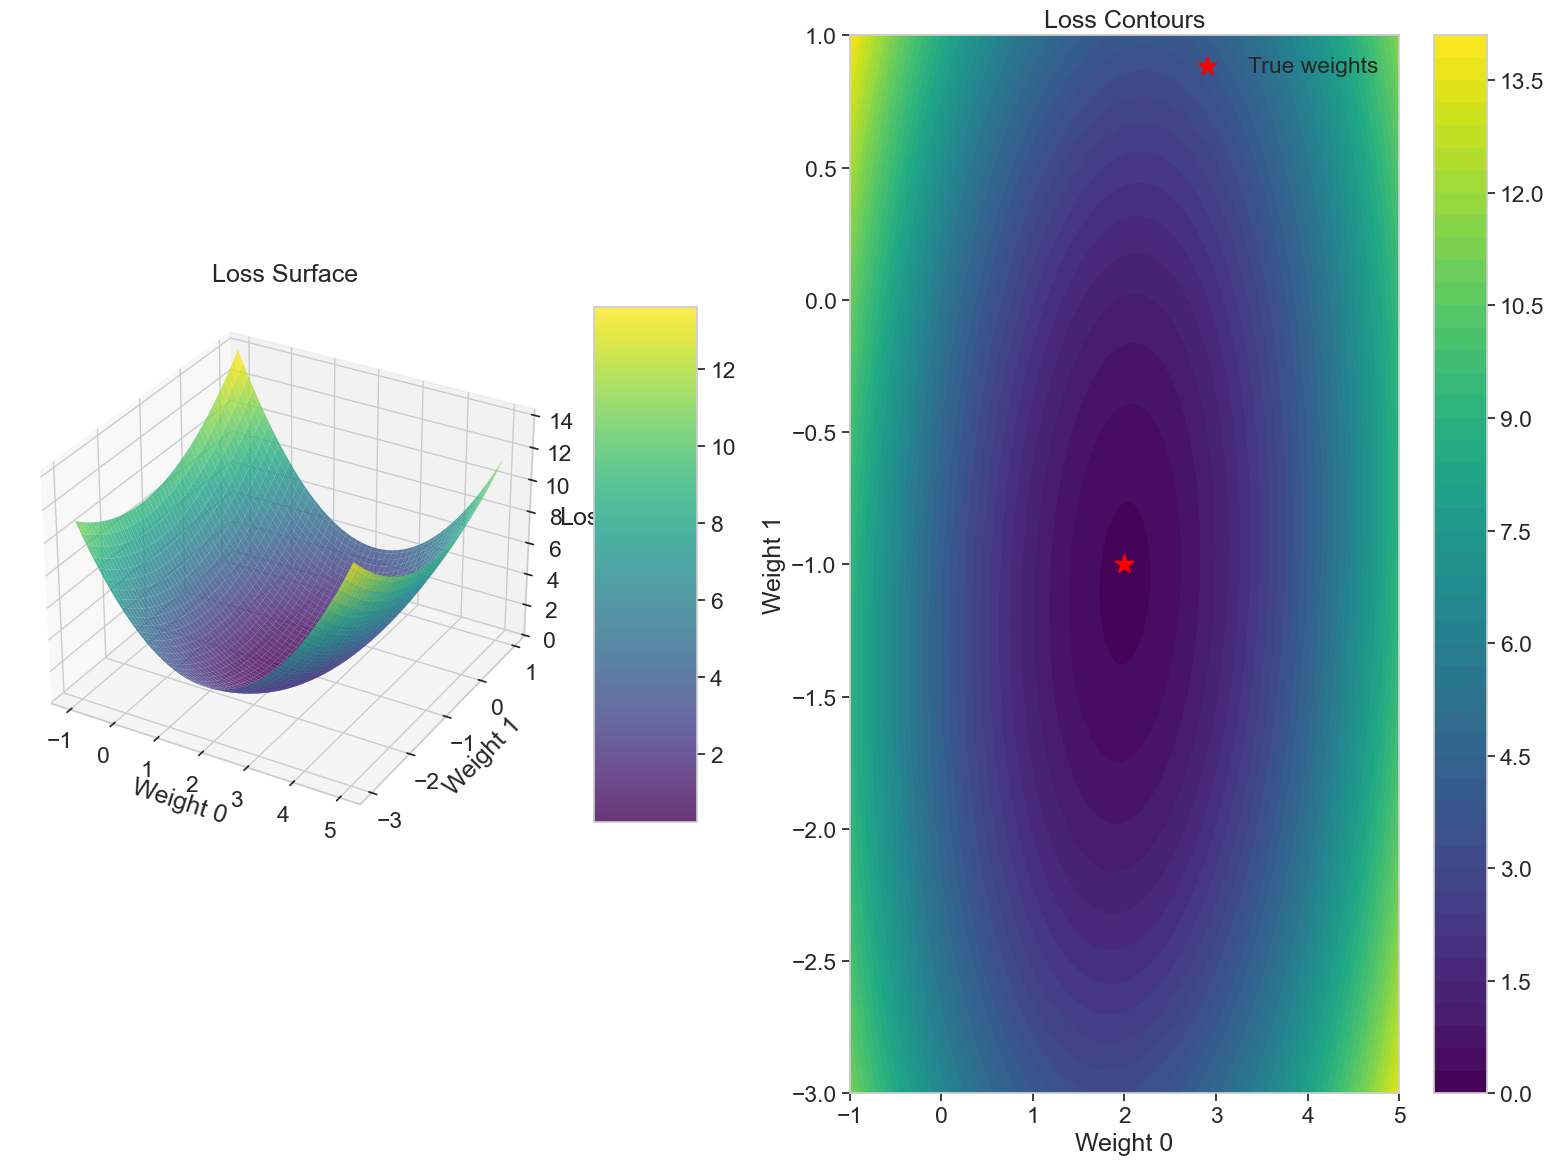

In [7]:
# Create a simpler dataset with just 2 features for visualization
np.random.seed(42)
m_simple = 100
n_simple = 2  # Just 2 features for easier visualization

# True weights
true_W_simple = np.array([2, -1]).reshape(n_simple, 1)

# Generate feature matrix X and target vector y
X_simple = np.hstack([np.ones((m_simple, 1)), np.random.randn(m_simple, n_simple-1)])
y_simple = X_simple @ true_W_simple + 0.5 * np.random.randn(m_simple, 1)

# Create a grid of weight values for visualization
w0_range = np.linspace(-1, 5, 100)
w1_range = np.linspace(-3, 1, 100)
w0_grid, w1_grid = np.meshgrid(w0_range, w1_range)

# Compute loss for each weight combination
loss_grid = np.zeros_like(w0_grid)
for i in range(len(w0_range)):
    for j in range(len(w1_range)):
        W_temp = np.array([w0_grid[j, i], w1_grid[j, i]]).reshape(n_simple, 1)
        loss_grid[j, i] = compute_loss(X_simple, y_simple, W_temp)

# Plot the loss surface
fig = plt.figure(figsize=(16, 12))

# 3D surface plot
ax1 = fig.add_subplot(121, projection='3d')
surface = ax1.plot_surface(w0_grid, w1_grid, loss_grid, cmap=cm.viridis, alpha=0.8)
ax1.set_xlabel('Weight 0')
ax1.set_ylabel('Weight 1')
ax1.set_zlabel('Loss')
ax1.set_title('Loss Surface')
fig.colorbar(surface, ax=ax1, shrink=0.5, aspect=5)

# 2D contour plot
ax2 = fig.add_subplot(122)
contour = ax2.contourf(w0_grid, w1_grid, loss_grid, 50, cmap=cm.viridis)
ax2.set_xlabel('Weight 0')
ax2.set_ylabel('Weight 1')
ax2.set_title('Loss Contours')
fig.colorbar(contour, ax=ax2)

# Mark the true weights
ax2.scatter(true_W_simple[0, 0], true_W_simple[1, 0], color='red', s=200, marker='*', label='True weights')

plt.legend()
plt.tight_layout()
plt.show()

## 5. Visualizing Gradient Descent on the Loss Surface

Now let's visualize the path that gradient descent takes on our loss surface:

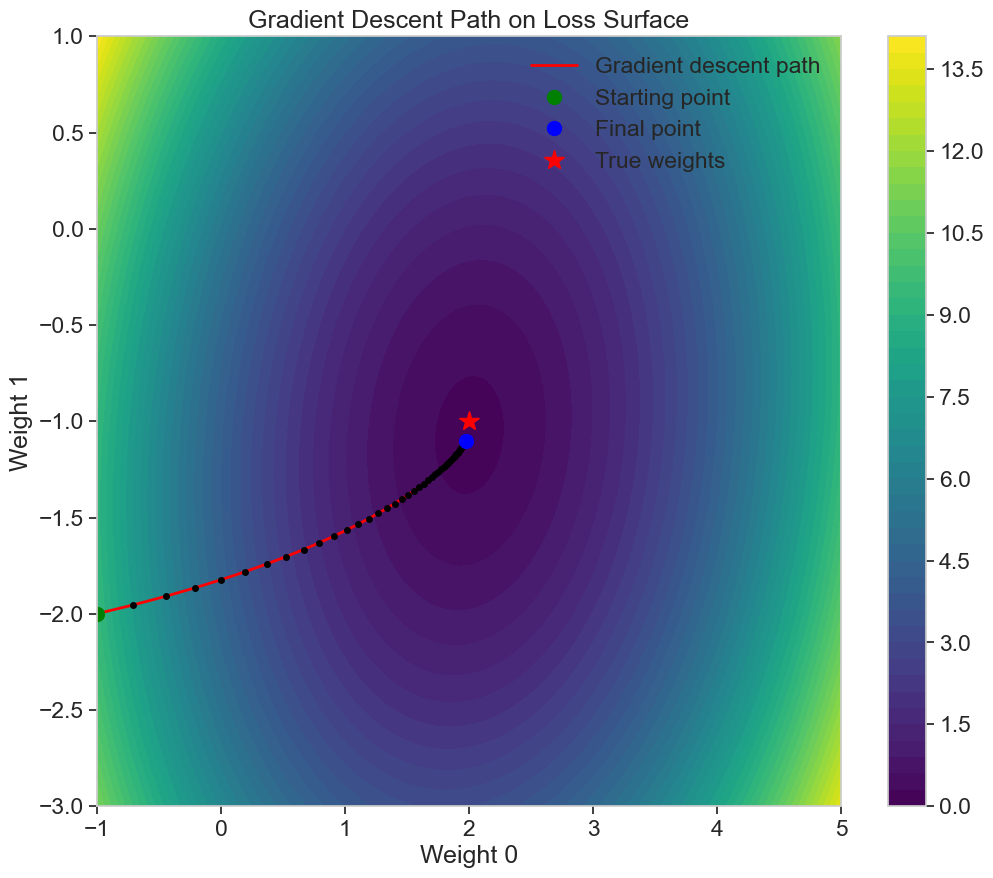

In [8]:
def gradient_descent_with_path(X, y, initial_W, learning_rate=0.01, num_iterations=100):
    """
    Perform gradient descent and keep track of the path of weights.
    """
    W = initial_W.copy()
    w_path = [W.copy()]
    loss_history = [compute_loss(X, y, W)]
    
    for i in range(num_iterations):
        gradient = compute_gradient(X, y, W)
        W = W - learning_rate * gradient
        w_path.append(W.copy())
        loss_history.append(compute_loss(X, y, W))
    
    return W, loss_history, w_path

# Run gradient descent for the simple case
initial_W_simple = np.array([-1, -2]).reshape(n_simple, 1)  # Start away from the true weights
optimized_W_simple, loss_history_simple, w_path_simple = gradient_descent_with_path(
    X_simple, y_simple, initial_W_simple, learning_rate=0.05, num_iterations=50)

# Extract the weight paths
w0_path = [w[0, 0] for w in w_path_simple]
w1_path = [w[1, 0] for w in w_path_simple]

# Plot the path on the contour plot
plt.figure(figsize=(12, 10))
contour = plt.contourf(w0_grid, w1_grid, loss_grid, 50, cmap=cm.viridis)
plt.colorbar(contour)

# Plot the gradient descent path
plt.plot(w0_path, w1_path, 'r-', linewidth=2, label='Gradient descent path')
plt.plot(w0_path, w1_path, 'ko', markersize=4)

# Mark start and end points
plt.plot(w0_path[0], w1_path[0], 'go', markersize=10, label='Starting point')
plt.plot(w0_path[-1], w1_path[-1], 'bo', markersize=10, label='Final point')

# Mark true weights
plt.plot(true_W_simple[0, 0], true_W_simple[1, 0], 'r*', markersize=15, label='True weights')

plt.xlabel('Weight 0')
plt.ylabel('Weight 1')
plt.title('Gradient Descent Path on Loss Surface')
plt.legend()
plt.show()

## 6. Effect of Learning Rate on Convergence

Let's investigate how the learning rate affects the convergence of gradient descent:

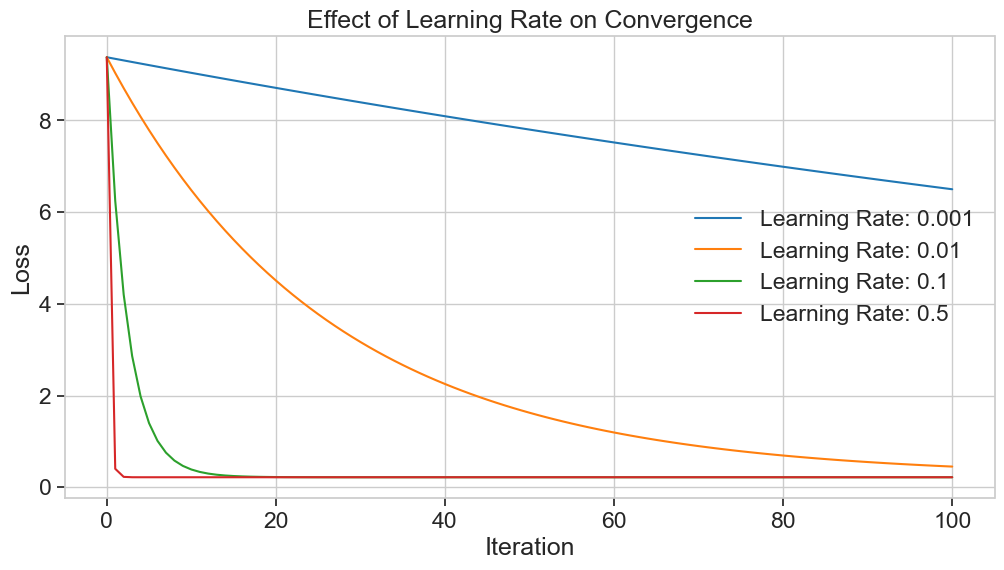

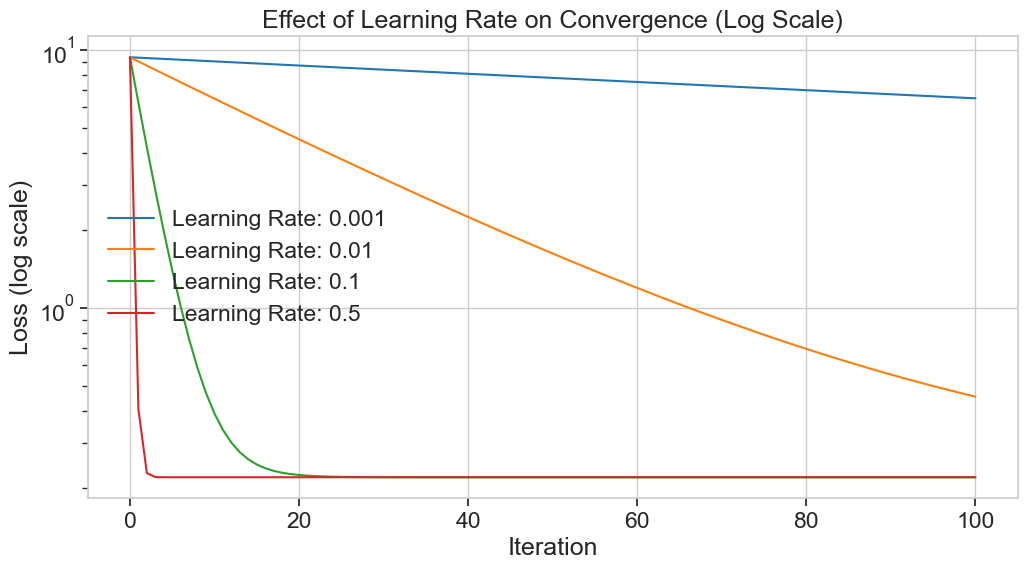

In [9]:
# Test different learning rates
learning_rates = [0.001, 0.01, 0.1, 0.5]
all_loss_histories = []
all_w_paths = []

for lr in learning_rates:
    W, loss_history, w_path = gradient_descent_with_path(
        X_simple, y_simple, initial_W_simple, learning_rate=lr, num_iterations=100)
    all_loss_histories.append(loss_history)
    all_w_paths.append(w_path)

# Plot loss histories for different learning rates
plt.figure(figsize=(12, 6))
for i, lr in enumerate(learning_rates):
    plt.plot(all_loss_histories[i], label=f'Learning Rate: {lr}')

plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Effect of Learning Rate on Convergence')
plt.legend()
plt.grid(True)
plt.show()

# Plot with log scale
plt.figure(figsize=(12, 6))
for i, lr in enumerate(learning_rates):
    plt.semilogy(all_loss_histories[i], label=f'Learning Rate: {lr}')

plt.xlabel('Iteration')
plt.ylabel('Loss (log scale)')
plt.title('Effect of Learning Rate on Convergence (Log Scale)')
plt.legend()
plt.grid(True)
plt.show()

## 7. Gradient Descent Paths for Different Learning Rates

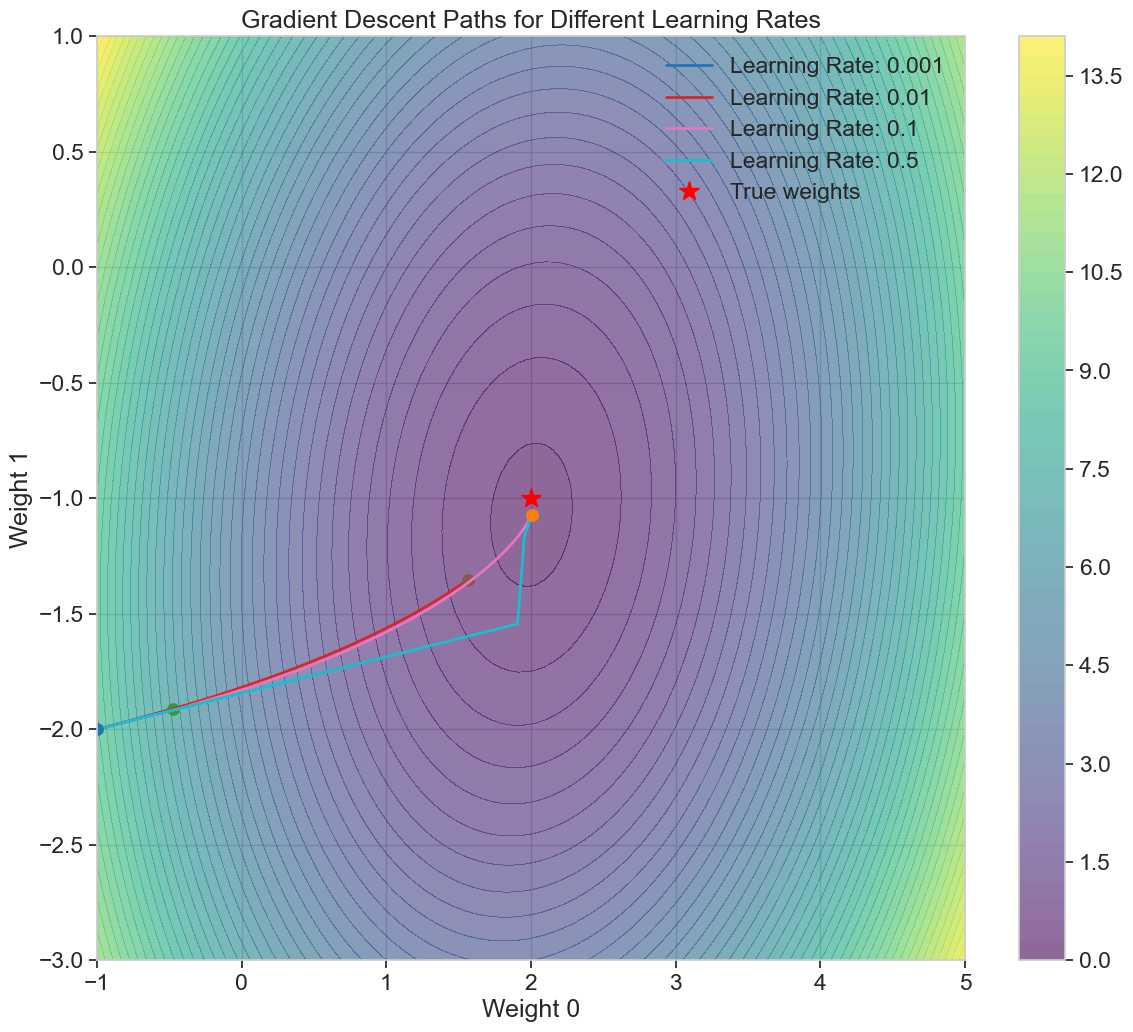

In [10]:
# Plot the paths for different learning rates on the contour plot
plt.figure(figsize=(14, 12))
contour = plt.contourf(w0_grid, w1_grid, loss_grid, 50, cmap=cm.viridis, alpha=0.6)
plt.colorbar(contour)

for i, lr in enumerate(learning_rates):
    w0_path = [w[0, 0] for w in all_w_paths[i]]
    w1_path = [w[1, 0] for w in all_w_paths[i]]
    plt.plot(w0_path, w1_path, '-', linewidth=2, label=f'Learning Rate: {lr}')
    plt.plot(w0_path[0], w1_path[0], 'o', markersize=8)
    plt.plot(w0_path[-1], w1_path[-1], 'o', markersize=8)

# Mark true weights
plt.plot(true_W_simple[0, 0], true_W_simple[1, 0], 'r*', markersize=15, label='True weights')

plt.xlabel('Weight 0')
plt.ylabel('Weight 1')
plt.title('Gradient Descent Paths for Different Learning Rates')
plt.legend()
plt.show()

## 8. Comparing with the Analytical Solution

For linear regression, we can actually compute the optimal weights analytically using the normal equation:

$$W = (X^TX)^{-1}X^Ty$$

Let's compare our gradient descent solution with this analytical solution:

In [11]:
def compute_analytical_solution(X, y):
    """
    Compute the analytical solution for linear regression.
    
    Parameters:
    X: Feature matrix (m x n)
    y: Target vector (m x 1)
    
    Returns:
    W: Optimal weight matrix (n x 1)
    """
    return np.linalg.inv(X.T @ X) @ X.T @ y

# Compute analytical solution for the original dataset
analytical_W = compute_analytical_solution(X, y)

print(f"Analytical solution: {analytical_W.flatten()}")
print(f"Gradient descent solution: {optimized_W.flatten()}")
print(f"True weights: {true_W.flatten()}")

# Compute and compare losses
analytical_loss = compute_loss(X, y, analytical_W)
gradient_descent_loss = compute_loss(X, y, optimized_W)

print(f"\nAnalytical solution loss: {analytical_loss:.4f}")
print(f"Gradient descent solution loss: {gradient_descent_loss:.4f}")

Analytical solution: [ 2.04639669 -3.40463983  0.91392895]
Gradient descent solution: [ 2.04639721 -3.40463849  0.91392879]
True weights: [ 2.  -3.5  1. ]

Analytical solution loss: 0.2775
Gradient descent solution loss: 0.2775


## 9. Summary

In this notebook, we have explored the concept of loss functions in matrix form, particularly for linear regression. We've seen:

1. How to represent the Mean Squared Error loss function in matrix form
2. The derivation of the gradient of the loss function with respect to the weights
3. Implementation of gradient descent for optimizing the weights
4. Visualization of the loss surface and the gradient descent path
5. The effect of learning rate on convergence
6. Comparison with the analytical solution

The key insights include:

1. The loss function in matrix form is: $L(W) = \frac{1}{m} (XW - y)^T(XW - y)$
2. The gradient of the loss function is: $\frac{\partial L}{\partial W} = \frac{2}{m} X^T(XW - y)$
3. The gradient descent update rule is: $W_{new} = W_{old} - \alpha \frac{\partial L}{\partial W}$
4. The learning rate greatly affects the convergence of gradient descent
5. For linear regression, there is an analytical solution: $W = (X^TX)^{-1}X^Ty$

Understanding these concepts is fundamental to many machine learning algorithms and optimization techniques.